In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'D:\mypython\ipl_data\deliveries.csv')

In [3]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Let's analyze the performance of DA Warner

In [4]:
df1=df[df['batsman']=='DA Warner']

In [5]:
df1.shape

(2902, 21)

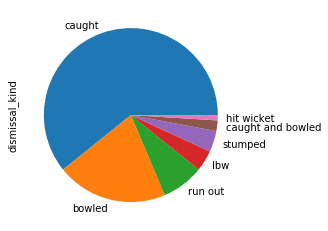

In [6]:
df1['dismissal_kind'].value_counts().plot.pie();

In [7]:
#total no of 4s was hit by DA
len(df1[df1['batsman_runs']==4])

401

In [8]:
#total no of 6s was hit by DA
len(df1[df1['batsman_runs']==6])

160

In [9]:
def count(df,runs):
    return len(df1[df1['batsman_runs']==runs])*runs
    

In [10]:
count(df1,1)

997

In [11]:
count(df1,2)

414

In [12]:
count(df1,3)

39

In [13]:
count(df1,4)

1604

In [14]:
count(df1,6)

960

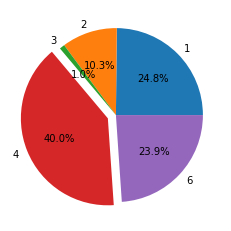

In [15]:
#as we can see he is in very much love with fours.
slices=[997,414,39,1604,960]
labels=[1,2,3,4,6]
explode=[0,0,0,0.1,0]
plt.pie(slices,labels=labels,autopct='%1.1f%%',explode=explode);

# Score distribition for teams by innings

In [16]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiant', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Daredevils', 'Chennai Super Kings', 'Rajasthan Royals',
       'Deccan Chargers', 'Kochi Tuskers Kerala', 'Pune Warriors',
       'Rising Pune Supergiants'], dtype=object)

In [17]:
teams={
    'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KIXP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'}

In [18]:
df['batting_team']=df['batting_team'].map(teams)
df['bowling_team']=df['bowling_team'].map(teams)

In [19]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,SRH,RCB,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,SRH,RCB,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,SRH,RCB,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,SRH,RCB,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [20]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [21]:
#setting up the columns of my dataframe
run_innings=df.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
run_innings.drop('match_id',axis=1,inplace=True)

In [22]:
run_innings.head()

,inning,batting_team,total_runs
0,1,SRH,207
1,2,RCB,172
2,1,MI,184
3,2,RPS,187
4,1,GL,183


In [23]:
innings1=run_innings[run_innings['inning']==1]
innings2=run_innings[run_innings['inning']==2]

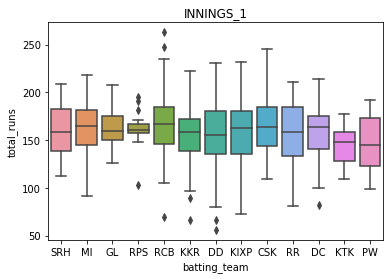

In [24]:
sns.boxplot(x='batting_team',y='total_runs',data=innings1).set_title("INNINGS_1");

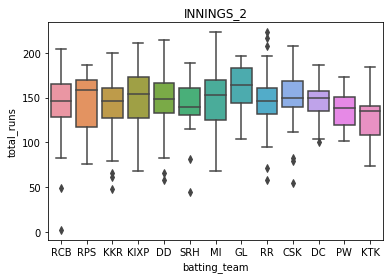

In [25]:
sns.boxplot(x='batting_team',y='total_runs',data=innings2).set_title("INNINGS_2");

# Teams which have scored more than 200 runs in a single innings

In [26]:
high_scores=df.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()

In [27]:
high_scores.head()

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
1,1,2,RCB,SRH,172
2,2,1,MI,RPS,184
3,2,2,RPS,MI,187
4,3,1,GL,KKR,183


In [28]:
score200=high_scores[high_scores['total_runs']>200]

In [29]:
score200.head()

,match_id,inning,batting_team,bowling_team,total_runs
0,1,1,SRH,RCB,207
16,9,1,DD,RPS,205
38,20,1,RCB,GL,213
62,32,1,SRH,KIXP,207
72,36,1,SRH,KKR,209


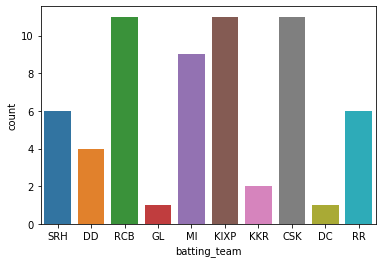

In [30]:
sns.countplot(score200['batting_team'])

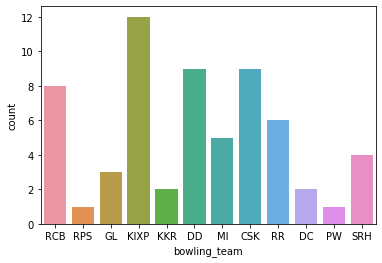

In [31]:
sns.countplot(score200['bowling_team'])

# Batman performance comparison

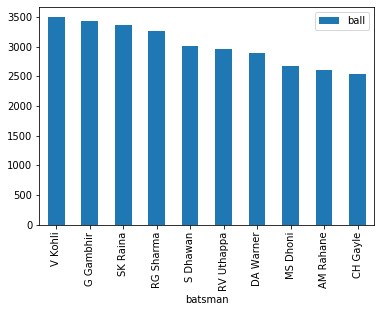

In [32]:
#top ten batsman who played the most balls
(df.
 groupby(["batsman"])[["ball"]].count()
 .sort_values('ball',ascending=False)
).iloc[:10].plot.bar();

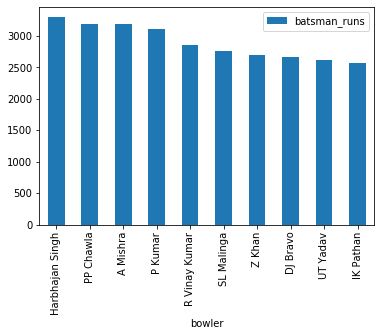

In [33]:
#top ten batsman who scored the most runs
(df.
 groupby(["bowler"])[["batsman_runs"]].sum()
 .sort_values('batsman_runs',ascending=False)
).iloc[:10].plot.bar();

In [34]:
balls=df.groupby('batsman')['ball'].count().reset_index()

In [35]:
balls.head()

,batsman,ball
0,A Ashish Reddy,196
1,A Chandila,7
2,A Chopra,75
3,A Choudhary,20
4,A Flintoff,57


In [36]:
runs=df.groupby('batsman')['batsman_runs'].sum().reset_index()

In [37]:
runs.head()

,batsman,batsman_runs
0,A Ashish Reddy,280
1,A Chandila,4
2,A Chopra,53
3,A Choudhary,25
4,A Flintoff,62


In [38]:
four=df[df['batsman_runs']==4]

In [39]:
four.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
2,1,1,SRH,RCB,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
8,1,1,SRH,RCB,2,2,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
13,1,1,SRH,RCB,2,7,MC Henriques,S Dhawan,A Choudhary,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
30,1,1,SRH,RCB,5,5,MC Henriques,S Dhawan,S Aravind,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
32,1,1,SRH,RCB,6,1,S Dhawan,MC Henriques,SR Watson,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [40]:
runs_four=four.groupby('batsman')['batsman_runs'].count().reset_index()

In [41]:
runs_four.columns=['batsman','4s']

In [42]:
runs_four.head()

,batsman,4s
0,A Ashish Reddy,16
1,A Chopra,7
2,A Choudhary,1
3,A Flintoff,5
4,A Kumble,3


In [43]:
six=df[df['batsman_runs']==6]

In [44]:
runs_six=six.groupby('batsman')['batsman_runs'].count().reset_index()

In [45]:
runs_six.columns=['batsman','6s']

In [46]:
runs_six.head()

,batsman,6s
0,A Ashish Reddy,15
1,A Choudhary,1
2,A Flintoff,2
3,A Mishra,5
4,A Mithun,1


In [47]:
player_run=pd.concat([runs,balls.iloc[:,1],runs_four.iloc[:,1],runs_six.iloc[:,1]],axis=1)

In [48]:
player_run.head()

,batsman,batsman_runs,ball,4s,6s
0,A Ashish Reddy,280,196,16.0,15.0
1,A Chandila,4,7,7.0,1.0
2,A Chopra,53,75,1.0,2.0
3,A Choudhary,25,20,5.0,5.0
4,A Flintoff,62,57,3.0,1.0


In [49]:
player_run.isna().sum()

batsman           0
batsman_runs      0
ball              0
4s               93
6s              160
dtype: int64

In [50]:
player_run.fillna(0,inplace=True)

In [51]:
player_run.isna().sum()

batsman         0
batsman_runs    0
ball            0
4s              0
6s              0
dtype: int64

In [52]:
player_run['strike_rate']=(player_run['batsman_runs']/player_run['ball'])*100

In [53]:
player_run.head()

,batsman,batsman_runs,ball,4s,6s,strike_rate
0,A Ashish Reddy,280,196,16.0,15.0,142.857143
1,A Chandila,4,7,7.0,1.0,57.142857
2,A Chopra,53,75,1.0,2.0,70.666667
3,A Choudhary,25,20,5.0,5.0,125.000000
4,A Flintoff,62,57,3.0,1.0,108.771930


# Finding top ten wicket takers

In [54]:
df['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [55]:
dismissal_kind2=['caught', 'bowled','lbw', 'caught and bowled',
       'stumped', 'hit wicket']

In [56]:
wickets=df[df['dismissal_kind'].isin(dismissal_kind2)]

In [57]:
wickets.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
11,1,1,SRH,RCB,2,5,DA Warner,S Dhawan,A Choudhary,0,...,0,0,0,0,0,0,0,DA Warner,caught,Mandeep Singh
64,1,1,SRH,RCB,11,3,S Dhawan,MC Henriques,STR Binny,0,...,0,0,0,0,0,0,0,S Dhawan,caught,Sachin Baby
94,1,1,SRH,RCB,16,2,MC Henriques,Yuvraj Singh,YS Chahal,0,...,0,0,0,0,0,0,0,MC Henriques,caught,Sachin Baby
116,1,1,SRH,RCB,19,4,Yuvraj Singh,DJ Hooda,TS Mills,0,...,0,0,0,0,0,0,0,Yuvraj Singh,bowled,NaN
160,1,2,RCB,SRH,6,4,Mandeep Singh,CH Gayle,Rashid Khan,0,...,0,0,0,0,0,0,0,Mandeep Singh,bowled,NaN


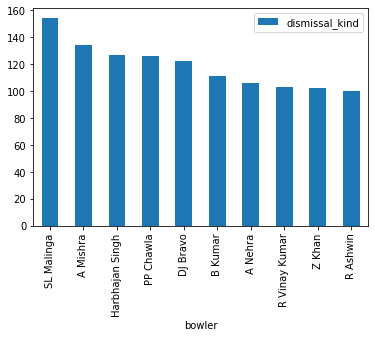

In [58]:
(wickets.
 groupby(["bowler"])[["dismissal_kind"]].count()
 .sort_values('dismissal_kind',ascending=False)
).iloc[:10].plot.bar();

# Getting into a different dataset with different views

In [60]:
df1=pd.read_csv(r'D:\mypython\ipl_data\matches.csv')

In [62]:
df1.shape

(636, 18)

In [65]:
df1.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [66]:
df1.drop(['umpire3'],axis=1,inplace=True)

In [69]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [ ]:
teams={
    'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KIXP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'}

In [70]:
df1['team1']=df1['team1'].map(teams)
df1['team2']=df1['team2'].map(teams)

In [71]:
df1.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,SRH,RCB,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,MI,RPS,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,GL,KKR,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,RPS,KIXP,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,RCB,DD,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [73]:
#total matches played
df1.shape[0]

636

In [77]:
#total no of venues
df1['venue'].nunique()

35

In [79]:
#total no of teams
df1['team2'].nunique()

13

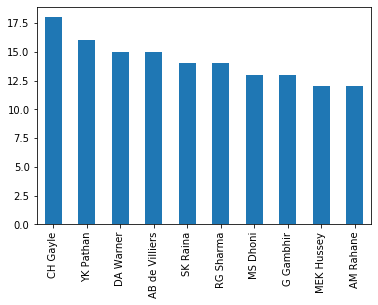

In [86]:
#most man of the match awards
df1['player_of_match'].value_counts().nlargest(10).plot.bar()

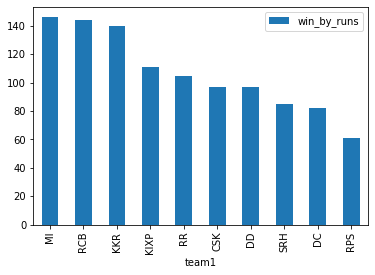

In [95]:
#maximum win by runs
(df1.
 groupby(["team1"])[["win_by_runs"]].max()
 .sort_values('win_by_runs',ascending=False)
).iloc[:10].plot.bar();

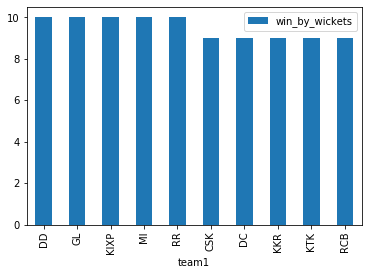

In [96]:
#maximum win by wickets
(df1.
 groupby(["team1"])[["win_by_wickets"]].max()
 .sort_values('win_by_wickets',ascending=False)
).iloc[:10].plot.bar();

# performing analysis across seasons

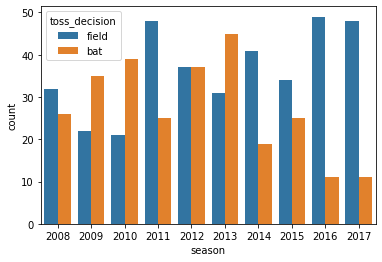

In [103]:
#after winning toss difference between decisions.
sns.countplot(x='season',hue='toss_decision',data=df1);

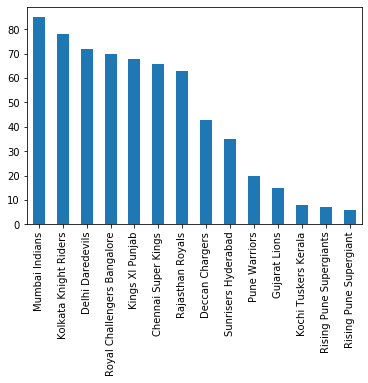

In [102]:
#top toss winning teams
df1['toss_winner'].value_counts().plot.bar();

# teams matches played vs how many times they won

In [106]:
matches_played=(df1['team1'].value_counts()+df1['team2'].value_counts()).reset_index()

In [107]:
matches_played.head()

,index,0
0,CSK,131
1,DC,75
2,DD,147
3,GL,30
4,KIXP,148


In [111]:
matches_played.columns=['team','total_matches']

In [112]:
matches_played

,team,total_matches
0,CSK,131
1,DC,75
2,DD,147
3,GL,30
4,KIXP,148
5,KKR,148
6,KTK,14
7,MI,157
8,PW,46
9,RCB,152


In [118]:
df1['winner']=df1['winner'].map(teams)

In [119]:
winners=df1['winner'].value_counts().reset_index()
winners.columns=['team','win_count']

In [120]:
winners

,team,win_count
0,MI,92
1,CSK,79
2,KKR,77
3,RCB,73
4,KIXP,70
5,RR,63
6,DD,62
7,SRH,42
8,DC,29
9,RPS,15


In [122]:
played_vs_win=matches_played.merge(winners,how='inner',on='team')

In [123]:
played_vs_win

,team,total_matches,win_count
0,CSK,131,79
1,DC,75,29
2,DD,147,62
3,GL,30,13
4,KIXP,148,70
5,KKR,148,77
6,KTK,14,6
7,MI,157,92
8,PW,46,12
9,RCB,152,73


In [124]:
played_vs_win['win_percentage']=(played_vs_win['win_count']/played_vs_win['total_matches'])*100

In [152]:
played_vs_win

,team,total_matches,win_count,win_percentage
0,CSK,131,79,0.603053
1,DC,75,29,0.386667
2,DD,147,62,0.421769
3,GL,30,13,0.433333
4,KIXP,148,70,0.472973
5,KKR,148,77,0.520270
6,KTK,14,6,0.428571
7,MI,157,92,0.585987
8,PW,46,12,0.260870
9,RCB,152,73,0.480263


In [129]:
import plotly.offline as py
import plotly.graph_objs as go

In [147]:
trace1= go.Bar(
x=played_vs_win['team'],
y=played_vs_win['total_matches'],name='played')



In [148]:
trace2= go.Bar(
x=played_vs_win['team'],
y=played_vs_win['win_count'],name='wins')

In [149]:
data=[trace1,trace2]
py.iplot(data)

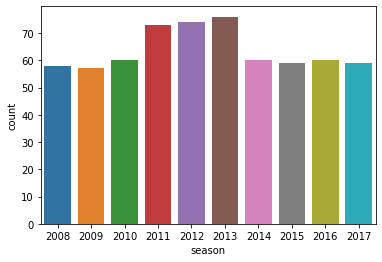

In [151]:
#no of matches played in each seasons
sns.countplot(df1['season']);